In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import scipy
import seaborn as sns

In [94]:
iris = sns.load_dataset("iris")

In [95]:
print(f"Dataframe size: {iris.shape[0]}x{iris.shape[1]}")
print(f"Count of features: {len(iris.columns) - 1}")
print(f"Num classes: {len(iris["species"].unique())}")
print("Class counts:")
for name, count in zip(*np.unique(iris["species"], return_counts=True)):
    print(f" - {name}: {count}")
null_values_count = iris.isnull().sum().sum()
print(f"Null values: {null_values_count} ({(iris.isnull().sum().sum() / iris.size * 100):.2f}%)")

if null_values_count > 0:
    iris = iris.dropna().reset_index(drop=True)

Dataframe size: 150x5
Count of features: 4
Num classes: 3
Class counts:
 - setosa: 50
 - versicolor: 50
 - virginica: 50
Null values: 0 (0.00%)


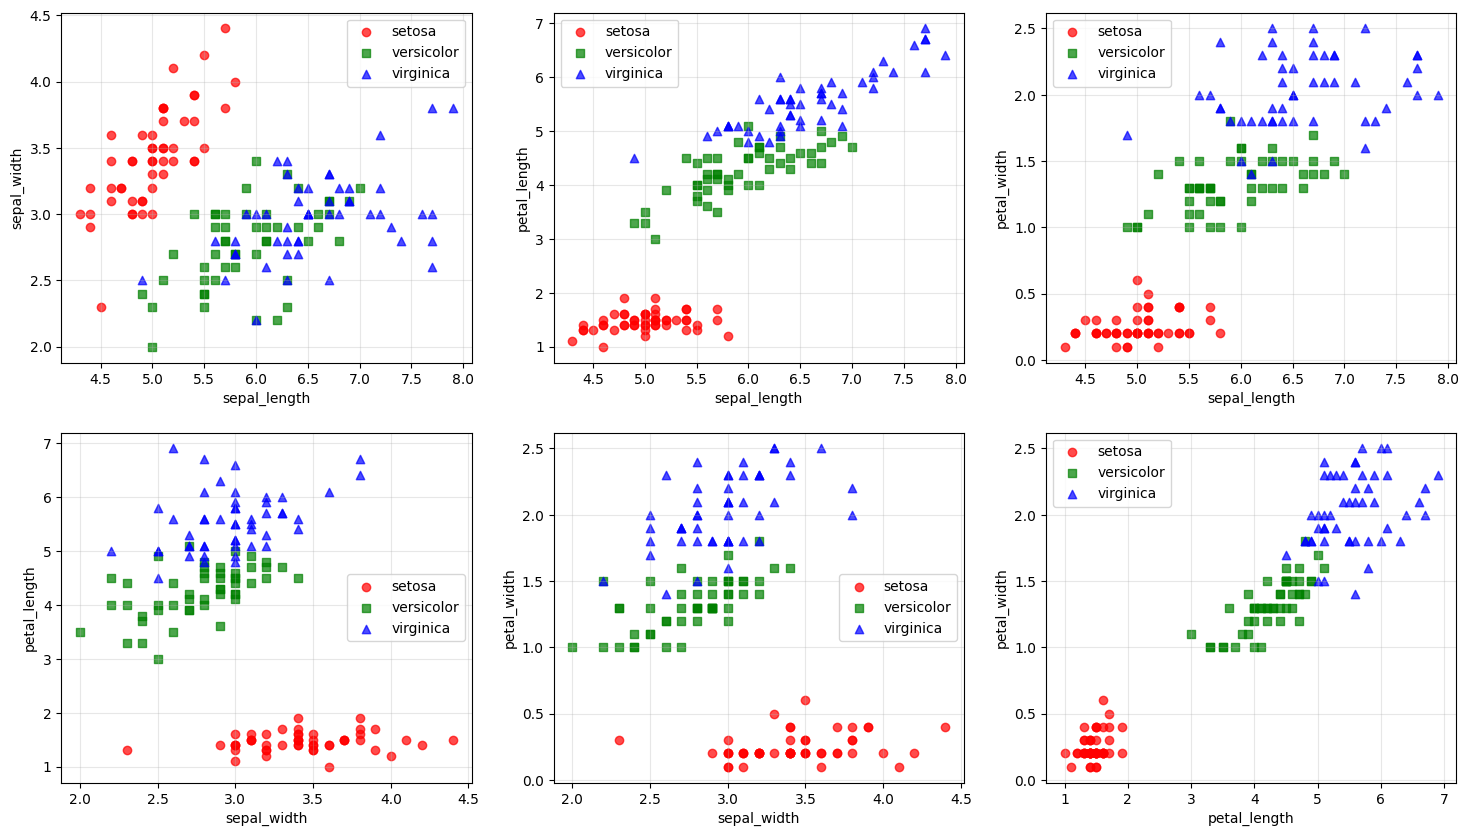

In [96]:
count_of_features = 4
columns = iris.columns

iris["target"], unique_names = pd.factorize(iris["species"])

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

styles = ["o", "s", "^"]
colors = ["red", "green", "blue"]

idx = 0
for i in range(count_of_features):
    for j in range(i + 1, count_of_features):
        data_to_show = np.array(iris[[columns[i], columns[j], "target"]])
        lax = ax[idx // ncols][idx % ncols]
        for group in np.unique(data_to_show[..., -1]):
            local_data = data_to_show[data_to_show[..., -1] == group]
            lax.scatter(
                local_data[..., 0],
                local_data[..., 1],
                marker=styles[int(group)],
                color=colors[int(group)],
                alpha=0.7,
                label=unique_names[int(group)])
        lax.set_xlabel(columns[i])
        lax.set_ylabel(columns[j])
        lax.grid(True, alpha=0.3)
        ax[idx // ncols][idx % ncols].legend()
        idx += 1


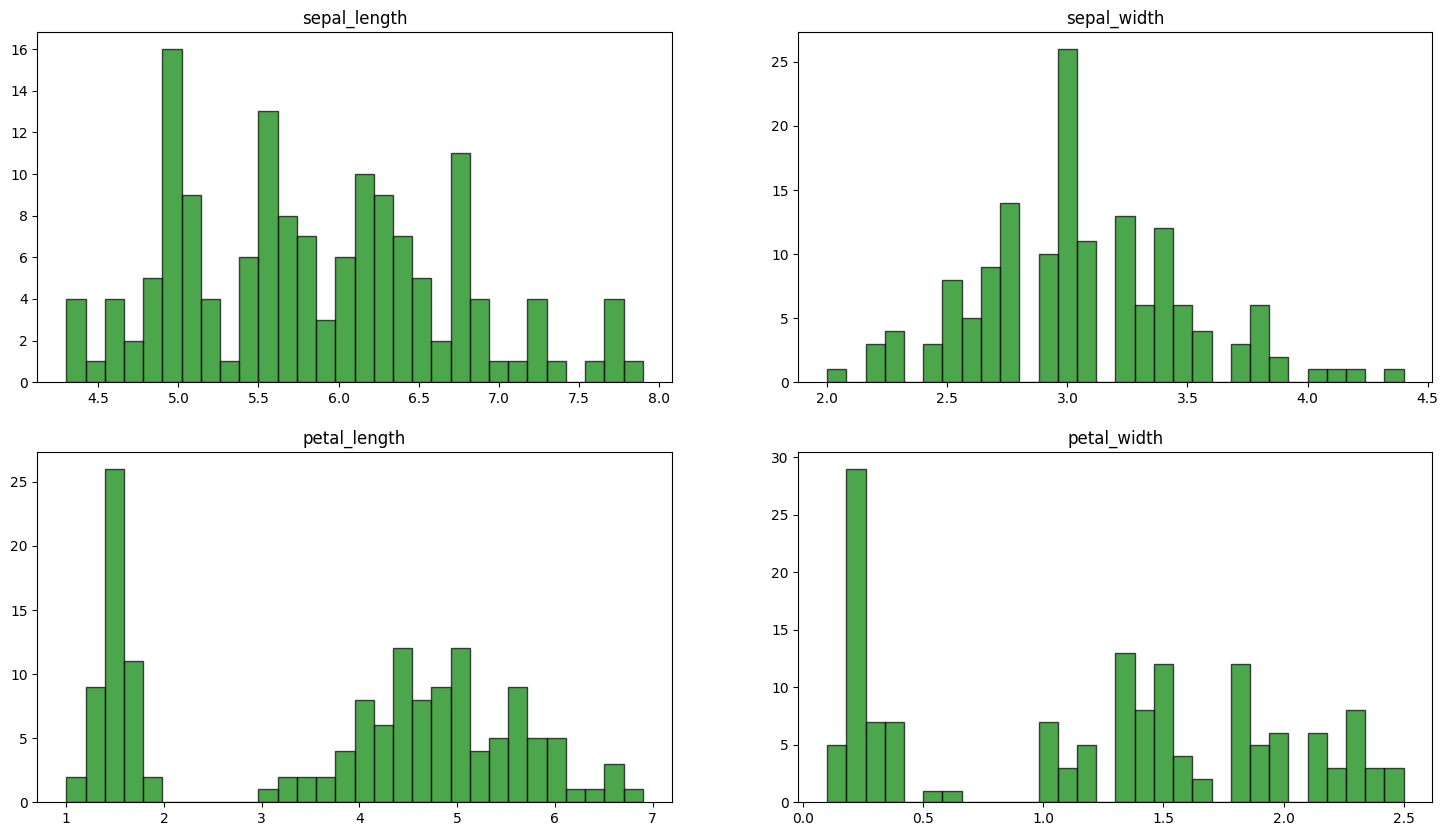

In [97]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

for i in range(count_of_features):
    data_to_show = iris[columns[i]]
    ax[i // ncols][i % ncols].set_title(columns[i])
    ax[i // ncols][i % ncols].hist(data_to_show, bins=30, color="green", edgecolor="black", alpha=0.7)

$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$

$ρ = r_{R_x, R_y} = \frac{\sum_{i=1}^{n} (R(x_i) - \bar{R_x})(R(y_i) - \bar{R_y})}{\sqrt{\sum_{i=1}^{n} (R(x_i) - \bar{R_x})^2} \sqrt{\sum_{i=1}^{n} (R(y_i) - \bar{R_y})^2}}$

In [98]:
def data_stats(data_table):
    pirson_matrix = np.zeros((count_of_features, count_of_features), dtype=np.float64)
    pirson_p_value = np.zeros((count_of_features, count_of_features), dtype=np.float64)
    spearman_matrix = np.zeros((count_of_features, count_of_features), dtype=np.float64)
    spearman_p_value = np.zeros((count_of_features, count_of_features), dtype=np.float64)

    for i in range(count_of_features):
        for j in range(count_of_features):
            pirson_v, pirson_pv = scipy.stats.pearsonr(data_table[columns[i]], data_table[columns[j]])
            pirson_matrix[i, j] = pirson_v
            pirson_p_value[i, j] = pirson_pv

            spearman_v, spearman_pv = scipy.stats.spearmanr(data_table[columns[i]], data_table[columns[j]])
            spearman_matrix[i, j] = spearman_v
            spearman_p_value[i, j] = spearman_pv


    drawing_query = [(pirson_matrix, "Pirson"),
                     (pirson_p_value, "Pirson p-value"),
                     (spearman_matrix, "Spearman"),
                     (spearman_p_value, "Spearman p-value")]
    
    return drawing_query

In [99]:
def draw_table(data_table):
    nrows = 2
    ncols = 2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

    drawing_query = data_stats(data_table)

    img = []
    for i, (draw_data, draw_name) in enumerate(drawing_query):
        row, col = i // ncols, i % ncols

        img.append(ax[row][col].imshow(draw_data, cmap="coolwarm"))
        
        for i in range(draw_data.shape[0]):
            for j in range(draw_data.shape[1]):
                text = ax[row, col].text(j, i, np.round(draw_data[i, j], 4), ha="center", va="center", color="w")

        ax[row][col].set_title(draw_name)
        ax[row][col].set_xticks(np.arange(count_of_features))
        ax[row][col].set_yticks(np.arange(count_of_features))
        ax[row][col].set_xticklabels(columns[:count_of_features])
        ax[row][col].set_yticklabels(columns[:count_of_features])

    cbar = fig.colorbar(img[0], ax=ax)
    cbar.set_label("Values", rotation=270, labelpad=20)
            

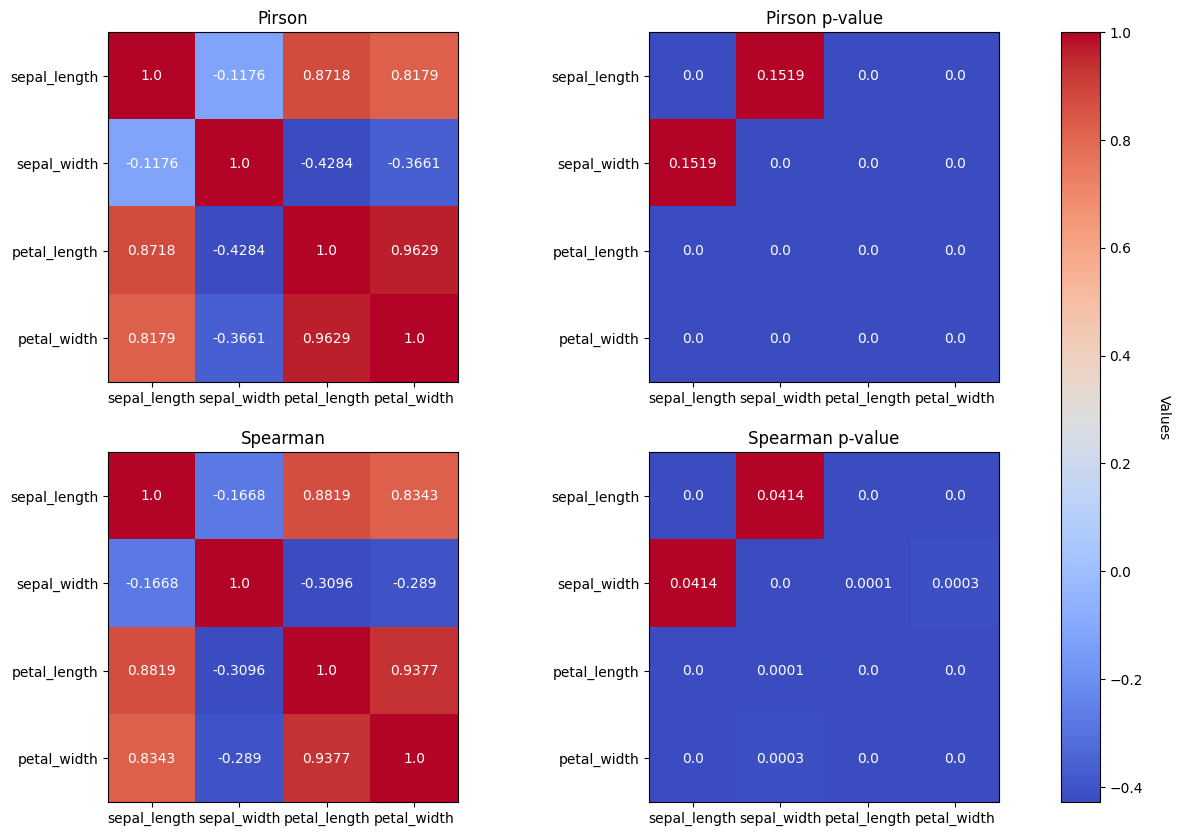

In [100]:
draw_table(iris)

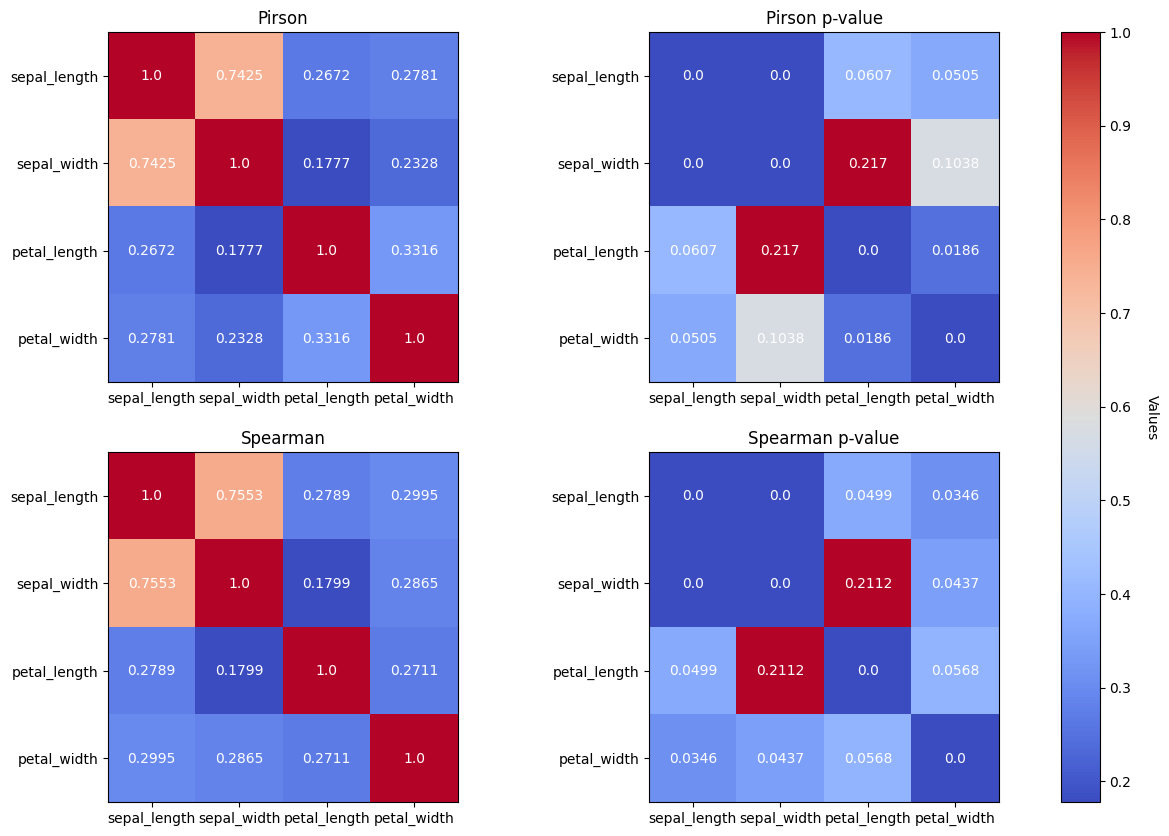

In [101]:
draw_table(iris[:][iris["target"] == 0])

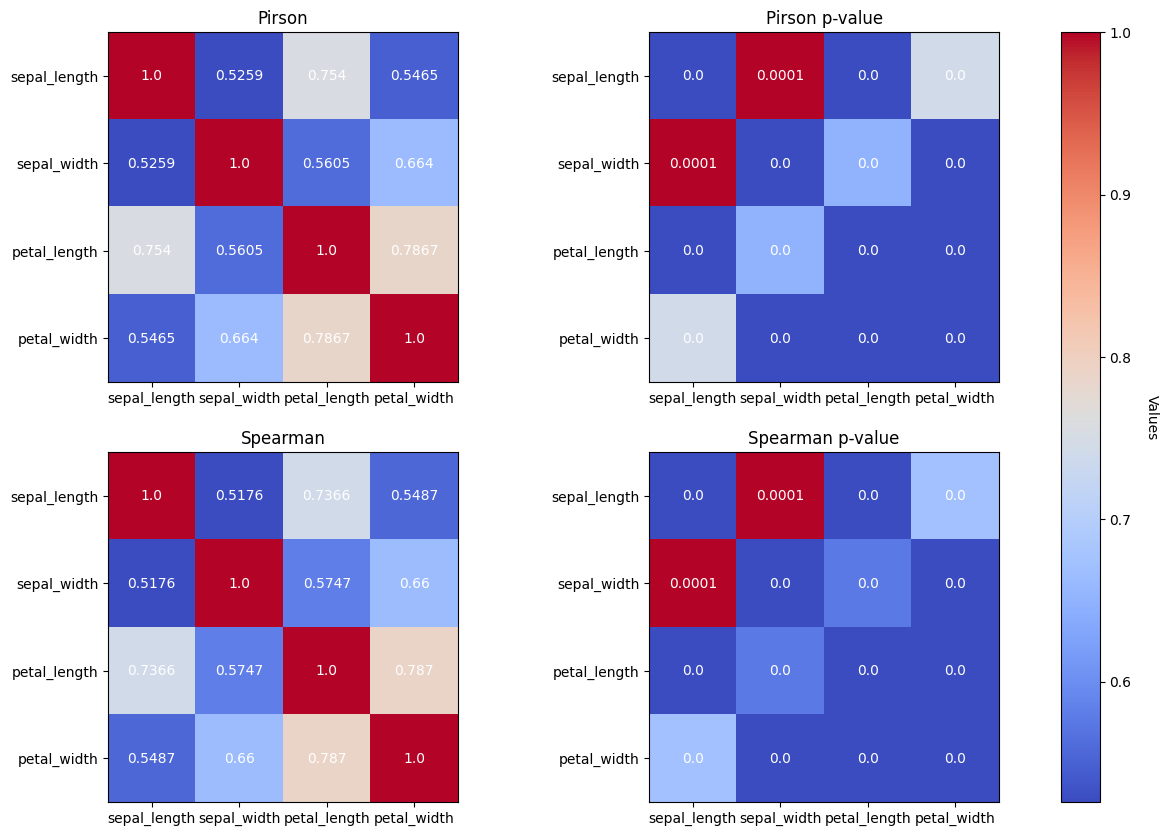

In [102]:
draw_table(iris[:][iris["target"] == 1])

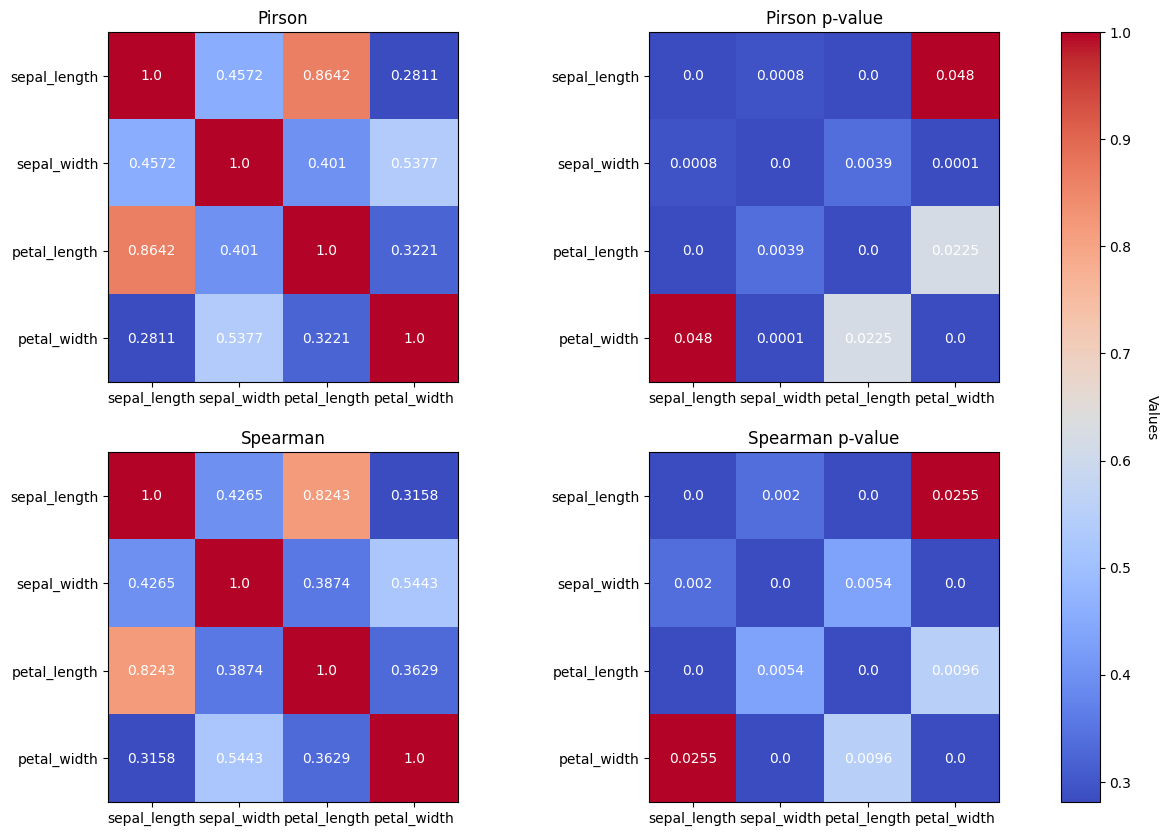

In [103]:
draw_table(iris[:][iris["target"] == 2])

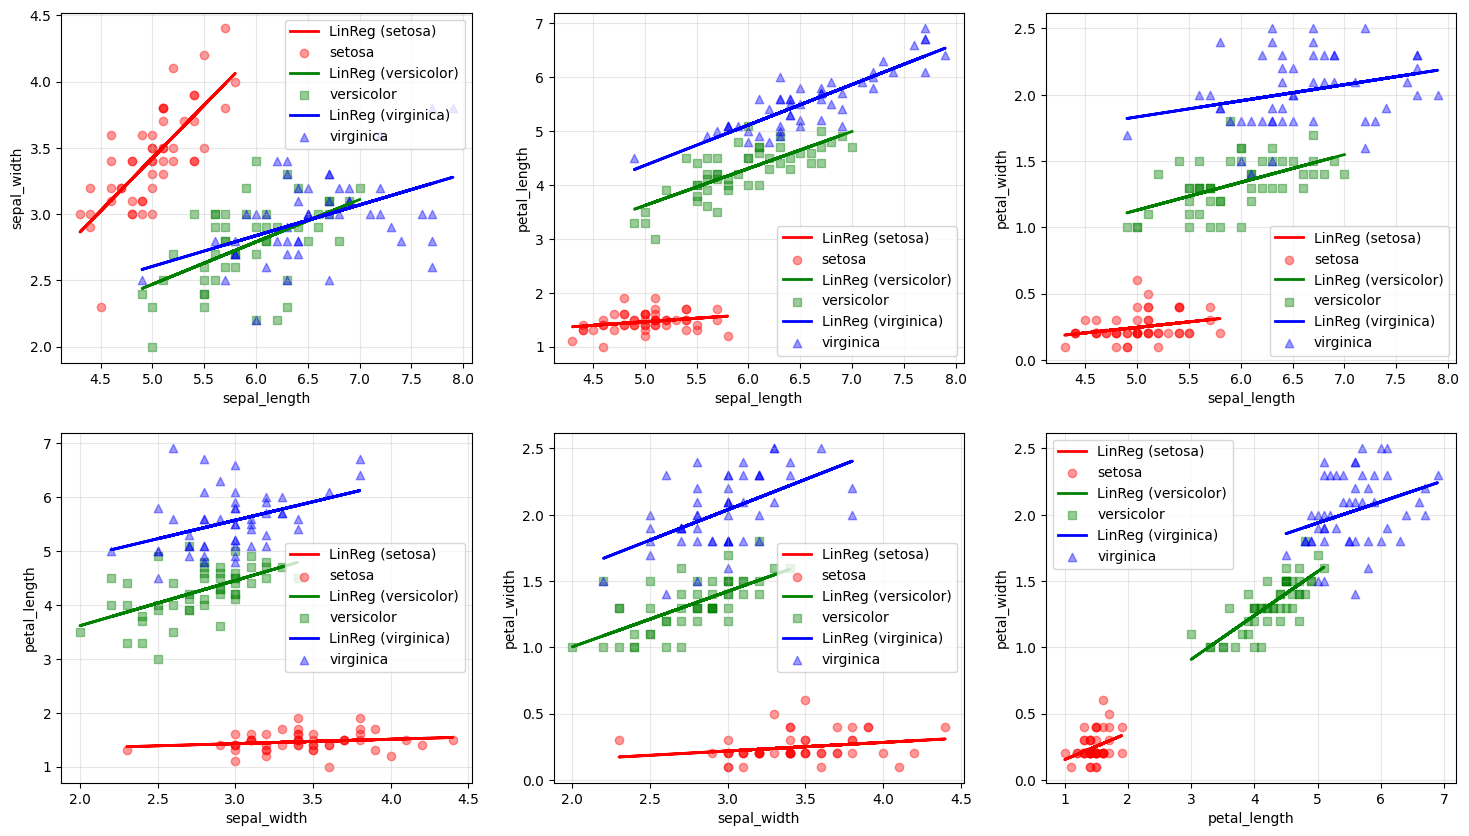

In [113]:
count_of_features = 4
columns = iris.columns

iris["target"], unique_names = pd.factorize(iris["species"])

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

styles = ["o", "s", "^"]
colors = ["red", "green", "blue"]

model = sl.linear_model.LinearRegression()

idx = 0
for i in range(count_of_features):
    for j in range(i + 1, count_of_features):
        data_to_show = np.array(iris[[columns[i], columns[j], "target"]])
        lax = ax[idx // ncols][idx % ncols]
        for group in np.unique(data_to_show[..., -1]):
            local_data = data_to_show[data_to_show[..., -1] == group]
            data_size = local_data.shape[0]
            
            x = local_data[..., 0].reshape((data_size, 1))
            model.fit(x, local_data[..., 1])
            y = model.predict(x)

            lax.plot(local_data[..., 0],
                     y,
                     linewidth=2,
                     color=colors[int(group)],
                     label=f"LinReg ({unique_names[int(group)]})")

            lax.scatter(
                local_data[..., 0],
                local_data[..., 1],
                marker=styles[int(group)],
                color=colors[int(group)],
                alpha=0.4,
                label=unique_names[int(group)])
        lax.set_xlabel(columns[i])
        lax.set_ylabel(columns[j])
        lax.grid(True, alpha=0.3)
        ax[idx // ncols][idx % ncols].legend()
        idx += 1